In [2]:
%load_ext autoreload
%autoreload 
%reload_ext autoreload

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from features import topological_features, aggregate_features, get_vars, extract_features
import pickle
import rolx
import numpy as np
import utils
import random
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
def get_scores(train_pred, train_true, val_pred, val_true, test_pred, test_true):
    train_accuracy = np.mean(train_pred == train_true)
    print("Train Accuracy: ", train_accuracy)

    train_f1 =  precision_recall_fscore_support(train_true, train_pred)
    print("Train Precision: ", train_f1[0][1])
    print("Train Recall: ", train_f1[1][1])
    print("Train F1: ", train_f1[2][1])
    
    val_accuracy = np.mean(val_pred == val_true)
    print("Validation Accuracy: ", val_accuracy)
    
    val_f1 =  precision_recall_fscore_support(val_true, val_pred)
    print("Validation Precision: ", val_f1[0][1])
    print("Validation Recall: ", val_f1[1][1])
    print("Validation F1: ", val_f1[2][1])

    test_accuracy = np.mean(test_pred == test_true)
    print("Test Accuracy: ", test_accuracy)
    
    test_f1 =  precision_recall_fscore_support(test_true, test_pred)
    print("Test Precision: ", test_f1[0][1])
    print("Test Recall: ", test_f1[1][1])
    print("Test F1: ", test_f1[2][1])

In [5]:
def get_rolx(fname, fname_extended, roles=3):
    G, dict_to_graph, graph_to_dict = rolx.load_graph_igraph(fname, fname_extended)
    H, R = rolx.extract_rolx_roles(G, roles) # H is the feature matrix, R is the role matrix
    print(H.shape, R.shape)
    H.tolist()

    adj_mat = G.get_adjacency()
    _, video_dict_list, graph_to_dict, neighbors, fields = get_vars(fname, fname_extended)
    # np.save('rolx_features', H)
    # H = np.load('rolx_features.npy')
    
    return adj_mat, H, video_dict_list, graph_to_dict, neighbors, fields

In [6]:
def get_features(adj_mat, H, video_dict_list, graph_to_dict, neighbors, fields, agg_flag=False):
    X = []
    y = []
    pos_data = []
    neg_data = []
    for row in range(adj_mat.shape[0]):
        H_row = np.array(H[row]).flatten()
        for col in range(adj_mat.shape[1]):
            H_total = np.array(H[col][0]).flatten() + H_row
            # print 'pre concatenated', type(H_total), H_total

            # flag for adding into agg and topo features
            if agg_flag:
                local_features = extract_features(video_dict_list, graph_to_dict, neighbors, fields, row, col) 
                # skip if doesnt exist
                if not local_features:
                    continue

                H_total = np.concatenate([H_total, local_features]) 
                # print 'after concatenated', type(H_total), H_total

            if adj_mat[row][col] > 0:
                pos_data.append((H_total, adj_mat[row][col]))
            else:
                neg_data.append((H_total, adj_mat[row][col]))
    
    return pos_data, neg_data

In [7]:
fname = './dataset/0222/0.txt'
fname_extended = './dataset/0222/1.txt'


adj_mat, H, video_dict_list, graph_to_dict, neighbors, fields = get_rolx(fname, fname_extended)
pos_data, neg_data = get_features(adj_mat, H, video_dict_list, graph_to_dict, neighbors, fields)

Creating Vertex Features matrix
V is a 3356 by 485 matrix.
Node-role matrix is of dimensions 3356 by 3
[[0.         0.0199036  0.00744173]
 [0.         0.02791589 0.03119776]
 [0.         0.01000588 0.01839252]
 ...
 [0.         0.00740323 0.01428153]
 [0.         0.00737681 0.01464255]
 [0.         0.00737681 0.01464255]]
[[3.97698502e+04 1.14131367e-01 2.00000000e+01 ... 1.14373638e-03
  1.14373638e-03 2.00000000e+01]
 [6.67290721e+04 1.22706739e-01 4.00000000e+00 ... 2.08546433e-04
  2.08546433e-04 4.00000000e+00]
 [0.00000000e+00 1.11362115e-01 3.00000000e+00 ... 1.85490526e-04
  1.85490526e-04 3.00000000e+00]
 ...
 [3.33333333e-01 5.58823529e-01 4.00000000e+00 ... 2.06357331e-04
  2.06357331e-04 4.00000000e+00]
 [0.00000000e+00 5.58823529e-01 4.00000000e+00 ... 1.98521122e-04
  1.98521122e-04 4.00000000e+00]
 [0.00000000e+00 5.58823529e-01 4.00000000e+00 ... 1.98521122e-04
  1.98521122e-04 4.00000000e+00]]
[[0.0040838  0.         0.01162752 0.         0.         0.
  0.         0.

In [8]:
fname_test = './dataset/080327/0.txt'
fname_test_extended = './dataset/080327/1.txt'

adj_mat_test, H_test, video_dict_list_test, graph_to_dict_test, neighbors_test, fields_test = get_rolx(fname_test, fname_test_extended)
pos_data_test, neg_data_test = get_features(adj_mat_test, H_test, video_dict_list_test, graph_to_dict_test, neighbors_test, fields_test)

Creating Vertex Features matrix
V is a 4330 by 408 matrix.


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Node-role matrix is of dimensions 4330 by 3
[[0.19925109 0.16108741 0.00058692]
 [0.07929716 0.13149653 0.05354079]
 [0.19925109 0.16108741 0.00058692]
 ...
 [0.09832276 0.13102633 0.05499859]
 [0.1229468  0.13840692 0.06407499]
 [0.08100141 0.12920092 0.08111056]]
[[1.27952413e+04 8.77933545e-02 2.00000000e+01 ... 3.99064480e-04
  3.99064480e-04 2.00000000e+01]
 [7.14285714e-01 8.07364935e-02 1.00000000e+01 ... 2.10219785e-04
  2.10219785e-04 1.00000000e+01]
 [1.27952413e+04 8.77933545e-02 2.00000000e+01 ... 3.99064480e-04
  3.99064480e-04 2.00000000e+01]
 ...
 [1.06668301e+01 5.27777778e-01 1.10000000e+01 ... 2.52185559e-04
  2.52185559e-04 1.10000000e+01]
 [1.25640720e+00 5.50724638e-01 1.20000000e+01 ... 2.52082882e-04
  2.52082882e-04 1.20000000e+01]
 [0.00000000e+00 5.06666667e-01 9.00000000e+00 ... 1.95368248e-04
  1.95368248e-04 9.00000000e+00]]
[[0.         0.         0.0248468  0.         0.         0.
  0.         0.02484618]
 [0.03682121 0.12328099 0.12870637 0.15966186 0.1

In [9]:
def show_graph(fname, fname_extended):
    video_dict_list = utils.load_file(fname)
    video_dict_list_extended = utils.load_file(fname_extended)
    G , dict_to_graph, graph_to_dict = utils.load_graph_undirected(video_dict_list)
    fname = 'youtube_graph.txt'
    # G = utils.load_graph_networkX(fname)

    #prints graph info and plots the Graph
    print('----Graph info----')
    print(G)
    print('------------------')



    print('Graph clustering coefficient', nx.average_clustering(G))
    utils.plot_graph_networkX(G, graph_to_dict, video_dict_list_extended)

----Graph info----
Graph with 3356 nodes and 3595 edges
------------------
Graph clustering coefficient 0.042347428040800064


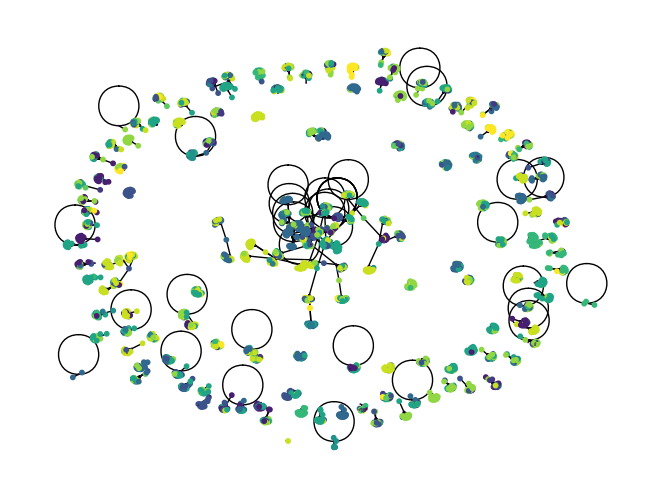

----Graph info----
Graph with 4330 nodes and 4276 edges
------------------
Graph clustering coefficient 0.016233029063938424


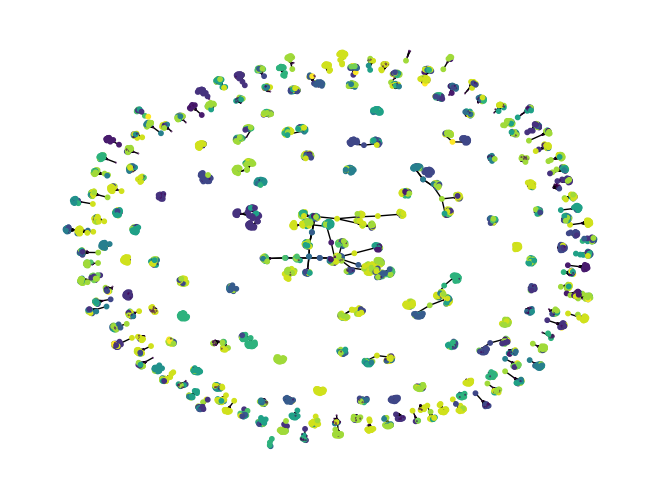

In [10]:
show_graph(fname, fname_extended)
show_graph(fname_test, fname_test_extended)

In [11]:
def split_data_balanced(pos_data, neg_data):
    # creates positive and negative dataset for more uniform distribution of data
    X = [pos_data[i][0] for i in range(len(pos_data))]
    Y = [pos_data[i][1] for i in range(len(pos_data))]

    random_indices = sorted(random.sample(range(len(neg_data)), len(X)))
    X_neg = [neg_data[i][0] for i in random_indices]
    Y_neg = [neg_data[i][1] for i in random_indices]

    X.extend(X_neg)
    Y.extend(Y_neg)

    X_array = np.array(X)
    Y_array = np.array(Y)
    
    print("X_array shape: ", X_array.shape)
    print("Y_array shape: ", Y_array.shape)
    from sklearn.preprocessing import normalize
    # change this line to change the number of features
    X_array = X_array[:, np.r_[:3]]
    print ("X_array shape change number of features: ", X_array.shape)
    

    # runs training by splitting train/test sets
    return train_test_split(X_array, Y_array, test_size=0.2, random_state=42)

In [12]:
def split_data(pos_data, neg_data):
    # runs training by splitting train/test sets
    X = [pos_data[i][0] for i in range(len(pos_data))]
    Y = [pos_data[i][1] for i in range(len(pos_data))]

    X_neg = [neg_data[i][0] for i in range(len(neg_data))]
    Y_neg = [neg_data[i][1] for i in range(len(neg_data))]

    X.extend(X_neg)
    Y.extend(Y_neg)

    X_array = np.array(X)
    Y_array = np.array(Y)
#     X_array = X_array[:, np.r_[:3]]

    X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.01, random_state=42)

    test_zero_vals = np.argwhere(y_test == 0)
    test_one_vals = np.argwhere(y_test == 1)
    print ('test zero vals: ', len(test_zero_vals), '\ttest one vals: ', len(test_one_vals))

    zero_vals = np.argwhere(y_train == 0)
    one_vals = np.argwhere(y_train == 1)
    random_indices = zero_vals[sorted(random.sample(range(len(zero_vals)), len(one_vals)))]
    random_indices = np.concatenate([random_indices, one_vals]).reshape(-1)

    X_train = X_train[random_indices]
    y_train = y_train[random_indices]
    print ("shape of X_train: ", X_train.shape)
    print ("shape of y_train: ", y_train.shape)

    train_zero_vals = np.argwhere(y_train == 0)
    train_one_vals = np.argwhere(y_train == 1)
    print ('train zero vals: ', len(train_zero_vals), '\ttrain one vals: ', len(train_one_vals))
    return X_train, X_test, y_train, y_test

In [13]:
print("----Train data, validate----")
X_train, X_val, y_train, y_val = split_data(pos_data, neg_data)
print("----Test data----")
_, X_test, _, y_test = split_data(pos_data_test, neg_data_test)

----Train data, validate----
test zero vals:  112185 	test one vals:  442
shape of X_train:  (83028, 3)
shape of y_train:  (83028,)
train zero vals:  41514 	train one vals:  41514
----Test data----
test zero vals:  187235 	test one vals:  254
shape of X_train:  (57420, 3)
shape of y_train:  (57420,)
train zero vals:  28710 	train one vals:  28710


In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X_train, y_train)

print ('---random forest---')
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
np.savetxt('results/random_forest.txt', test_predictions)

---random forest---
Train Accuracy:  0.6029411764705882
Train Precision:  0.7161280534061599
Train Recall:  0.34108975285445875
Train F1:  0.4620882079396936
Validation Accuracy:  0.8638438043825691
Validation Precision:  0.010388585705832074
Validation Recall:  0.3574660633484163
Validation F1:  0.020190403169126573
Test Accuracy:  0.4417912517534362
Test Precision:  0.001775215698251508
Test Recall:  0.7322834645669292
Test F1:  0.003541845187089403


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
print ('---logistic regression---')
# makes predictions
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
np.savetxt('results/logistic_regression.txt', test_predictions)

---logistic regression---
Train Accuracy:  0.5840198487257311
Train Precision:  0.6172121782377848
Train Recall:  0.4424290600761189
Train F1:  0.515405769446627
Validation Accuracy:  0.7305288205419611
Validation Precision:  0.0067616597400883965
Validation Recall:  0.4638009049773756
Validation F1:  0.013328998699609884
Test Accuracy:  0.6810212865821461
Test Precision:  0.002406457327161216
Test Recall:  0.5669291338582677
Test F1:  0.004792571514153063


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
from sklearn import svm

svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

print ('---svm_rbf---')
# makes predictions
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

train_preds = [pred > 0.5 for pred in train_predictions]
test_preds = [pred > 0.5 for pred in test_predictions]

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
# np.savetxt('results/svm_rbf.txt', test_predictions)

---svm_rbf---
Train Accuracy:  0.5840198487257311
Train Precision:  0.6172121782377848
Train Recall:  0.4424290600761189
Train F1:  0.515405769446627
Validation Accuracy:  0.7305288205419611
Validation Precision:  0.0067616597400883965
Validation Recall:  0.4638009049773756
Validation F1:  0.013328998699609884
Test Accuracy:  0.6810212865821461
Test Precision:  0.002406457327161216
Test Recall:  0.5669291338582677
Test F1:  0.004792571514153063


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn import svm

svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

print ('---svm linear---')
# makes predictions
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

train_preds = [pred > 0.5 for pred in train_predictions]
test_preds = [pred > 0.5 for pred in test_predictions]

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
# np.savetxt('results/svm_linear.txt', test_predictions)

---svm linear---
Train Accuracy:  0.5840198487257311
Train Precision:  0.6172121782377848
Train Recall:  0.4424290600761189
Train F1:  0.515405769446627
Validation Accuracy:  0.7305288205419611
Validation Precision:  0.0067616597400883965
Validation Recall:  0.4638009049773756
Validation F1:  0.013328998699609884
Test Accuracy:  0.6810212865821461
Test Precision:  0.002406457327161216
Test Recall:  0.5669291338582677
Test F1:  0.004792571514153063


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print ('---knn---')
# makes predictions
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

train_preds = [pred > 0.5 for pred in train_predictions]
test_preds = [pred > 0.5 for pred in test_predictions]

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
np.savetxt('results/knn.txt', test_predictions)

---knn---
Train Accuracy:  0.9598448716095775
Train Precision:  0.9262492743267986
Train Recall:  0.9992532639591463
Train F1:  0.9613673232908458
Validation Accuracy:  0.8555155023617573
Validation Precision:  0.024680237794991892
Validation Recall:  0.9298642533936652
Validation F1:  0.0480842351564785
Test Accuracy:  0.7891022940012481
Test Precision:  0.0017501585288522512
Test Recall:  0.27165354330708663
Test F1:  0.0034779102295924794


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

print ('---naive bayes---')
# makes predictions
train_predictions = clf.predict(X_train)
val_predictions = clf.predict(X_val)
test_predictions = clf.predict(X_test)

train_preds = [pred > 0.5 for pred in train_predictions]
test_preds = [pred > 0.5 for pred in test_predictions]

get_scores(train_predictions, y_train, val_predictions, y_val, test_predictions, y_test)
np.savetxt('results/naive_bayes.txt', test_predictions)

---naive bayes---
Train Accuracy:  0.5272919978802332
Train Precision:  0.520307570977918
Train Recall:  0.6992580816110228
Train F1:  0.5966538548496496
Validation Accuracy:  0.3606740774940512
Validation Precision:  0.004060984060984061
Validation Recall:  0.6628959276018099
Validation F1:  0.00807251487767247
Test Accuracy:  0.2321042834512958
Test Precision:  0.0017403966162806823
Test Recall:  0.9881889763779528
Test F1:  0.0034746736437005965


c:\Users\Bao Tran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
print(X_train)

[[0.08112945 0.04279189 0.10556264]
 [0.40280036 0.83042211 0.07649792]
 [0.         0.19314054 0.05940503]
 ...
 [0.05036799 0.10164728 0.13463207]
 [0.         0.05526012 0.02442897]
 [1.73877047 0.04143651 0.45130646]]
